## Описание задачи

Имеющийся датасет предоставляет информацию о продуктивности работников в швейной промышленности. Необходимо по имеющимся данным предсказывать производительность работников по заданой информации.

Датасет содержит следующие атрибуты:

* date - Дата в формате ММ-ДД-ГГГГ
* day - День недели
* quarter - Квартал
* department - Отдел
* team - Номер группы
* no_of_workers - Количество рабочих в каждой команде
* no_of_style_change - Количество изменений стиля конкретного товара
* target_productivity - Целевая производительность, устанавливаемая для каждой команды на каждый день.
* smv - Standard Minute Value, это выделенное время для задачи.
* wip - Количество незавершенных изделий для продуктов
* over_time - Представляет количество сверхурочных для каждой команды в минутах.
* incentive - Представляет размер финансового стимула (в BDT), который позволяет или мотивирует определенный образ действий.
* idle_time - Количество времени, в течение которого производство было прервано по нескольким причинам.
* idle_men - Количество рабочих, которые простаивали из-за перебоев в производстве.
* actual_productivity - Фактическая производительность, достигнутая рабочими. Принимает значения от 0 до 1.

Так как перед нами стоит задача классификации, диапазон продутивности необходимо изменить на бинарный признак, отображающий производительность рабочих.

## Чтение и обработка данных, борьба с выбросами.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
url = "https://raw.githubusercontent.com/SokolovAndrey1/ML_UNN/main/garments_worker_productivity.csv"
data_raw = pd.read_csv(url) 

In [3]:
data_raw

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
data_raw.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Из приведенных выше данных видно, что:
* В ~43% записей отсутствует информация о количестве незавершенных изделий для продуктов
* Фактическая производительность имеет выбросы (признак должен принимать значения от 0 до 1). Также необходимо преобразовать данный признак в категориальное значение. Для сбалансированности выборки примем за признак хорошей производительности команды значение продуктивности в промежутке от 0.75 до 1.0.
* Столбцы с датой, кварталом и номером группы не повлияет на классификацию.
* Признаки с типом "object" необходимо преобразовать в строковые или категориальные значения.

In [ ]:
data = data_raw
# Столбцы с датой, кварталом и номером группы не повлияет на классификацию.
data = data.drop(data.loc[:,['date', 'quarter', 'team']], axis = 1)

# Признаки с типом "object" необходимо преобразовать в категориальные значения.
data['department'] = data['department'].astype('category')
data['day'] = data['day'].astype('category')

# В ~43% записей отсутствует информация о количестве незавершенных изделий для продуктов.
data['wip'] = data['wip'].fillna(0)

# Бинаризуем значения достигнутой продуктивности
data['actual_productivity'][data["actual_productivity"] <= 0.75] = 0
data['actual_productivity'] = data['actual_productivity'].astype('bool')

## Визуализация данных и описательная статистика

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   department             1197 non-null   category
 1   day                    1197 non-null   category
 2   targeted_productivity  1197 non-null   float64 
 3   smv                    1197 non-null   float64 
 4   wip                    1197 non-null   float64 
 5   over_time              1197 non-null   int64   
 6   incentive              1197 non-null   int64   
 7   idle_time              1197 non-null   float64 
 8   idle_men               1197 non-null   int64   
 9   no_of_style_change     1197 non-null   int64   
 10  no_of_workers          1197 non-null   float64 
 11  actual_productivity    1197 non-null   bool    
dtypes: bool(1), category(2), float64(5), int64(4)
memory usage: 88.1 KB


Получим сводную информацию о количественных, категориальных и бинарных признаках

In [8]:
data.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


In [9]:
data.describe(include=['category'])

,department,day
count,1197,1197
unique,2,6
top,sweing,Wednesday
freq,691,208


In [10]:
data.describe(include=['bool'])

,actual_productivity
count,1197
unique,2
top,True
freq,716


Рассмотрим матрицу корреляции для количественных признаков:

In [11]:
corr_mat = data.corr()
corr_mat

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.399369
smv,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.056642
wip,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.063613
over_time,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,0.000162
incentive,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.097891
idle_time,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.069651
idle_men,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.130051
no_of_style_change,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.229777
no_of_workers,-0.084288,0.912176,0.373908,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.003698
actual_productivity,0.399369,-0.056642,0.063613,0.000162,0.097891,-0.069651,-0.130051,-0.229777,-0.003698,1.000000


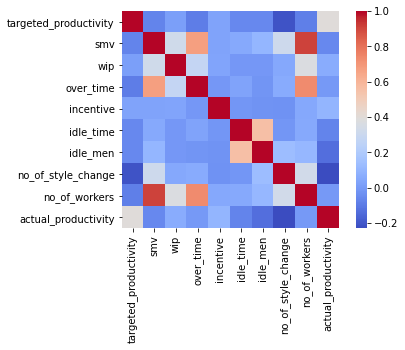

In [12]:
sns.heatmap(corr_mat, square = True, cmap = 'coolwarm')
pass

In [13]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

smv        no_of_workers    0.912176
over_time  no_of_workers    0.734164
smv        over_time        0.674887
idle_time  idle_men         0.559146
dtype: float64

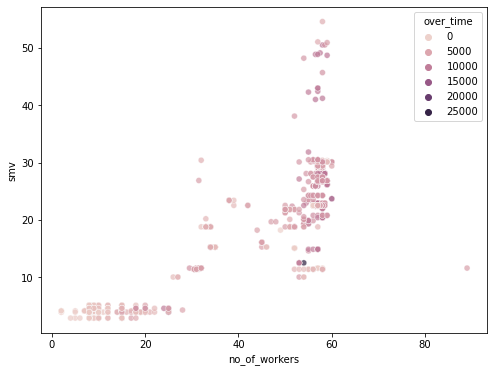

In [14]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x='no_of_workers', y='smv', hue='over_time', data=data, alpha=0.7)
pass

Из полученных значений видно, что существует сильная кореляция между выделенным временем на задачу и количеством рабочих в команде. Можно заметить, что высокое значение сверхурочного времени в основном характерно для больших команд. 

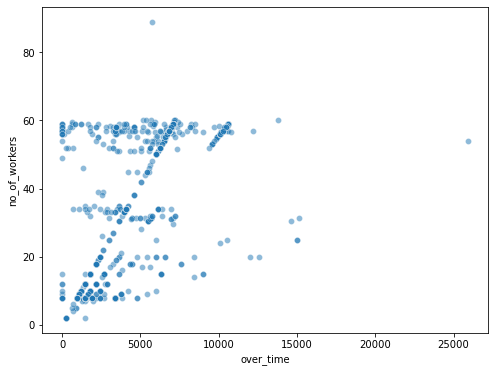

In [15]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x='over_time', y='no_of_workers', data=data, alpha=0.5)
pass

На данной диаграмме рассеивания признаков `'over_time'` и `'no_of_workers'` можно убедиться, что переработки характерны для больших команд.

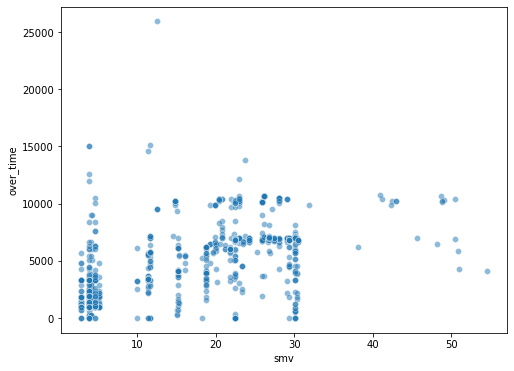

In [16]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x='smv', y='over_time', data=data, alpha=0.5)
pass

Данная диаграмма рассеивания подтверждает корреляцию между временем переработок и выделенным временем на задачу.   

После анализа данных закодируем день недели с помощью числовых и бинаризуем признак отдела, которому пренадлежит команда

In [17]:
data['day'] = pd.factorize(data['day'])[0]

department_dummies = pd.get_dummies(data['department'])

data = data.drop(['department'], axis=1)

department_dummies

,finishing,sweing
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1192,1,0
1193,1,0
1194,1,0
1195,1,0


## Нормализация количественных признаков

In [18]:
normalized_data = data.drop(['actual_productivity'], axis=1)

normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())

normalized_data = pd.concat((normalized_data, department_dummies), axis=1)

normalized_data

,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,finishing,sweing
0,0.0,1.000000,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.0,0.655172,0,1
1,0.0,0.931507,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,1,0
2,0.0,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0,1
3,0.0,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0,1
4,0.0,1.000000,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.0,0.620690,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1.0,0.931507,0.000000,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,1,0
1193,1.0,0.863014,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,1,0
1194,1.0,0.794521,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,1,0
1195,1.0,0.931507,0.000000,0.000000,0.069444,0.000000,0.0,0.0,0.0,0.149425,1,0


## Разбиение данные на обучающую и тестовую выборки

In [19]:
normalized_data.columns

Index(['day', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'finishing', 'sweing'],
      dtype='object')

In [20]:
X = normalized_data
y = data['actual_productivity']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

## k-nearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k_values = [1,2,3,4,5,7,10,15,20]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    y_test_predict  = knn.predict(X_test)

    error_train = np.mean(y_train != knn.predict(X_train))
    error_test  = np.mean(y_test  != knn.predict(X_test))

    print('k =', k)
    print('Error train =', error_train)
    print('Error test =', error_test)

k = 1
Error train = 0.02564102564102564
Error test = 0.2
k = 2
Error train = 0.11594202898550725
Error test = 0.27666666666666667
k = 3
Error train = 0.1415830546265329
Error test = 0.23
k = 4
Error train = 0.1605351170568562
Error test = 0.27
k = 5
Error train = 0.18283166109253066
Error test = 0.24
k = 7
Error train = 0.20512820512820512
Error test = 0.2633333333333333
k = 10
Error train = 0.21516164994425863
Error test = 0.29
k = 15
Error train = 0.23522853957636566
Error test = 0.29
k = 20
Error train = 0.2552954292084727
Error test = 0.29


## SVC

In [24]:
from sklearn.svm import SVC

svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict  = svc.predict(X_test)

error_train = np.mean(y_train != svc.predict(X_train))
error_test  = np.mean(y_test  != svc.predict(X_test))

print('Error train =', error_train)
print('Error test =', error_test)

Error train = 0.3132664437012263
Error test = 0.3233333333333333


## Random Forest

In [25]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict  = rf.predict(X_test)

error_train = np.mean(y_train != rf.predict(X_train))
error_test  = np.mean(y_test  != rf.predict(X_test))

print('Error train =', error_train)
print('Error test =', error_test)

Error train = 0.024526198439241916
Error test = 0.14


## Gradient Boosting Trees 

In [26]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 25)
gbt.fit(X_train, y_train)

y_train_predict = gbt.predict(X_train)
y_test_predict  = gbt.predict(X_test)

error_train = np.mean(y_train != gbt.predict(X_train))
error_test  = np.mean(y_test  != gbt.predict(X_test))

print('Error train =', error_train)
print('Error test =', error_test)

Error train = 0.12486064659977704
Error test = 0.17333333333333334


## Заключение и выводы

В рамках данной работы был выбран датасет с 1197 записей о продуктивности работников в швейной промышленности. Данные были обработаны и проанализированы, разбиты на обучающую и тестовую выборки в соотношении 3:1. Для решения задачи классификации был использован метод "k-ближаших соседей".

Используемый метод был протестирован с различными значениями параметрами *k*. Определение класса по ближайшему соседу *(k=1)* показазало лучшую точность классификации (~2% на обучающей выборке и ~20% на тестовой выборке).

   k | Error train | Error test
-----| ----------- | -----------
**1** |   **0.02** |    **0.2**
   2 |        0.11 |       0.27
   3 |        0.14 |       0.23
   4 |        0.16 |       0.27
   5 |        0.18 |       0.24
   7 |        0.20 |       0.26
  10 |        0.21 |       0.29
  15 |        0.23 |       0.29
  20 |        0.25 |       0.29

Лучший показатель ошибки на тествовой выборке показывает случайный лес c ошибкой в **15%**.